# Proyek Analisis Data: Nama dataset
- Nama: Arya Widya Hastungkoro
- Email: wharya22@gmail.com

## Menentukan Pertanyaan Bisnis

- Di musim apa sepeda paling banyak dipinjam?
- Bagaimana performa peminjaman sepeda harian dalam beberapa bulan terakhir?

## Menyaipkan semua library yang dibuthkan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [7]:
data_path = "data/hour.csv"

### Gathering Data

In [8]:
dataframe = pd.read_csv(data_path)
print(dataframe.shape)
dataframe.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
dataframe.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data


Melakukan pengecekan data sebelum memulai analisis data. Pada tahap ini, akan dilakukan evaluasi terhadap jenis tipe data, keberadaan nilai yang hilang, kemungkinan duplikasi data, serta parameter statistik dari dataset.

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi: ", dataframe.duplicated().sum())
dataframe.isna().sum()

Jumlah duplikasi:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing values

### Cleaning Data

In [12]:
# Mengubah type data yang tidak sesuai
category_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for columns in category_columns:
    dataframe[columns] = dataframe[columns].astype('category')
    
dataframe['dteday'] = pd.to_datetime(dataframe['dteday'])

In [13]:
# Mengonversi nilai untuk kolom 'season' menjadi musim: 1:Winter, 2:Spring, 3:Summer, 4:Fall
dataframe['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)

# Mengonversi nilai untuk kolom 'yr' menjadi tahun: 0:2011, 1:2012
dataframe['yr'].replace({0: 2011, 1: 2012}, inplace=True)

# Mengonversi nilai untuk kolom 'mnth' menjadi bulan: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
dataframe['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

# Mengonversi nilai untuk kolom 'weathersit' menjadi kondisi cuaca: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
dataframe['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'}, inplace=True)

# Mengonversi nilai untuk kolom 'weekday' menjadi hari: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
dataframe['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)

# Mengonversi nilai untuk kolom 'workingday' menjadi status kerja: 0:No, 1:Yes
dataframe['workingday'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# Drop kolom 
data = dataframe.drop("instant", axis=1)
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Winter,2012,Dec,19,0,Monday,Yes,Misty,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,Winter,2012,Dec,20,0,Monday,Yes,Misty,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,Winter,2012,Dec,21,0,Monday,Yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,Winter,2012,Dec,22,0,Monday,Yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

- Di musim apa sepeda paling banyak dipinjam?
- Bagaimana performa peminjaman sepeda harian dalam beberapa bulan terakhir?

### Explore ...

In [17]:
data.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2.0,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,NaN,May,NaN,0.0,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879.0,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
data.groupby(by="mnth").agg({
    "yr":  "nunique",
    "cnt": "nunique",
})

C:\Users\aryaw\AppData\Local\Temp\ipykernel_17128\1835555805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by="mnth").agg({


,yr,cnt
mnth,,
Jan,2,314
Feb,2,343
Mar,2,440
Apr,2,502
May,2,551
Jun,2,558
Jul,2,551
Aug,2,560
Sep,2,557


In [19]:
data.groupby(by="season").cnt.nunique().sort_values(ascending=False)

C:\Users\aryaw\AppData\Local\Temp\ipykernel_17128\1679083027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(by="season").cnt.nunique().sort_values(ascending=False)


season
Summer    760
Spring    721
Fall      690
Winter    482
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

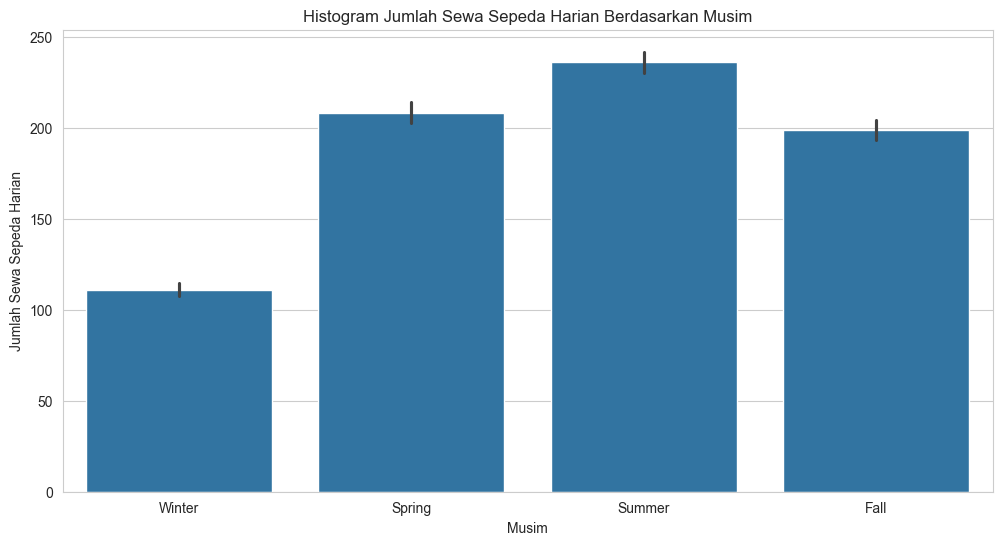

In [20]:
# Pola berdasarkan bulan
# Di musim apa sepeda paling banyak dipinjam?
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="season", y="cnt", data=data)
plt.title("Histogram Jumlah Sewa Sepeda Harian Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

### Pertanyaan 2: 

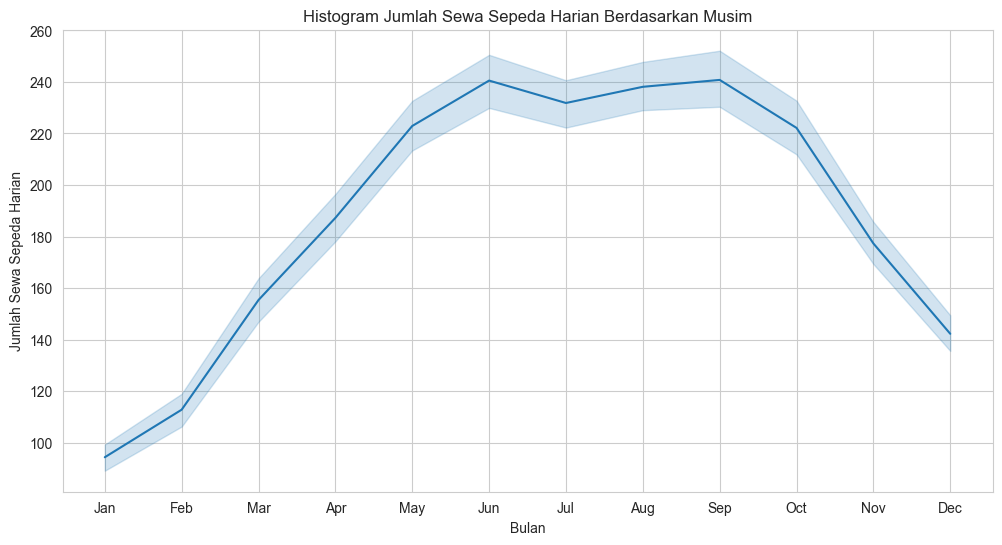

In [21]:
# Bagaimana performa peminjaman sepeda harian dalam beberapa bulan terakhir?
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="mnth", y="cnt", data=data)
plt.title("Histogram Jumlah Sewa Sepeda Harian Berdasarkan Musim")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

## Conclusion

1. Di musim apa sepeda paling banyak dipinjam?

   Berdasarkan data, pada musim panas(summer) sepeda paling banyak di pinjam sekitar 230 sampai 240 sepeda

2. Bagaimana performa peminjaman sepeda harian dalam beberapa bulan terakhir?

   Berdasarkan data, performanya menurun, penurunan dimulai pada bulan september hingga bulan desember mencapai 140an peminjaman sepeda